In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import ast

In [2]:
filmes = pd.read_csv('movies_metadata.csv', low_memory = False)
avaliacoes = pd.read_csv('ratings.csv')

In [3]:
filmes = filmes [['id','original_title','original_language','vote_count','genres','production_companies']]
filmes.rename(columns = {'id':'ID_FILME','original_title':'TITULO','original_language':'LINGUAGEM','vote_count':'QT_AVALIACOES','genres':"GENEROS",'production_companies':'PRODUTORAS'}, inplace = True)


In [4]:
filmes.head(5)

,ID_FILME,TITULO,LINGUAGEM,QT_AVALIACOES,GENEROS,PRODUTORAS
0,862,Toy Story,en,5415.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","[{'name': 'Pixar Animation Studios', 'id': 3}]"
1,8844,Jumanji,en,2413.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'name': 'TriStar Pictures', 'id': 559}, {'na..."
2,15602,Grumpier Old Men,en,92.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...","[{'name': 'Warner Bros.', 'id': 6194}, {'name'..."
3,31357,Waiting to Exhale,en,34.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",[{'name': 'Twentieth Century Fox Film Corporat...
4,11862,Father of the Bride Part II,en,173.0,"[{'id': 35, 'name': 'Comedy'}]","[{'name': 'Sandollar Productions', 'id': 5842}..."


In [4]:
df = pd.read_csv('movies_metadata.csv', low_memory = False)
filmes["GENEROS"]=df['genres']
filmes['PRODUTORAS']=df['production_companies']

In [ ]:
filmes.head(10)

In [5]:
filmes.dropna(inplace = True)
filmes = filmes[filmes['QT_AVALIACOES'] > 999]
filmes = filmes[filmes['LINGUAGEM'] == 'en']
filmes['ID_FILME'] = filmes['ID_FILME'].astype(int)


In [6]:
avaliacoes = avaliacoes [['userId','movieId','rating']]
avaliacoes.rename(columns = {'userId':'ID_USUARIO','movieId':'ID_FILME','rating':'AVALIACAO'}, inplace = True)
avaliacoes.isna().sum()
avaliacoes['ID_USUARIO'].value_counts()
qt_avaliacoes = avaliacoes['ID_USUARIO'].value_counts() > 999
y = qt_avaliacoes[qt_avaliacoes].index
avaliacoes = avaliacoes[avaliacoes['ID_USUARIO'].isin(y)]

In [ ]:
avaliacoes.head(10)

In [ ]:
filmes.head(10)

In [7]:
avaliacoes_e_filmes = avaliacoes.merge(filmes, on = 'ID_FILME')
avaliacoes_e_filmes.drop_duplicates(['ID_USUARIO','ID_FILME'], inplace = True)
del avaliacoes_e_filmes['ID_FILME']

In [ ]:
avaliacoes_e_filmes.head(10)

In [ ]:
avaliacoes_e_filmes.shape

In [8]:
def get_genres_names(data: str) -> list:
    if isinstance(data, str):
        data = ast.literal_eval(data)
        names = [item['name'] for item in data]
        return names
    return []

def get_names(data: str) -> list:
    try:
        companies = ast.literal_eval(data)
        names = [company['name'] for company in companies]
        return names
    except (ValueError, TypeError):
        return []

In [9]:
    
avaliacoes_e_filmes['PRODUTORAS'] = avaliacoes_e_filmes['PRODUTORAS'].apply(get_names)
avaliacoes_e_filmes['GENEROS'] = avaliacoes_e_filmes['GENEROS'].apply(get_genres_names)

avaliacoes_e_filmes_comp_exploded = avaliacoes_e_filmes.explode('PRODUTORAS')
avaliacoes_e_filmes_gen_exploded = avaliacoes_e_filmes.explode('GENEROS')

num_top_produtoras = 10
num_top_generos = 10

top_produtoras = avaliacoes_e_filmes_comp_exploded['PRODUTORAS'].value_counts()
top_generos = avaliacoes_e_filmes_gen_exploded['GENEROS'].value_counts()

In [ ]:
top_generos.head(10)

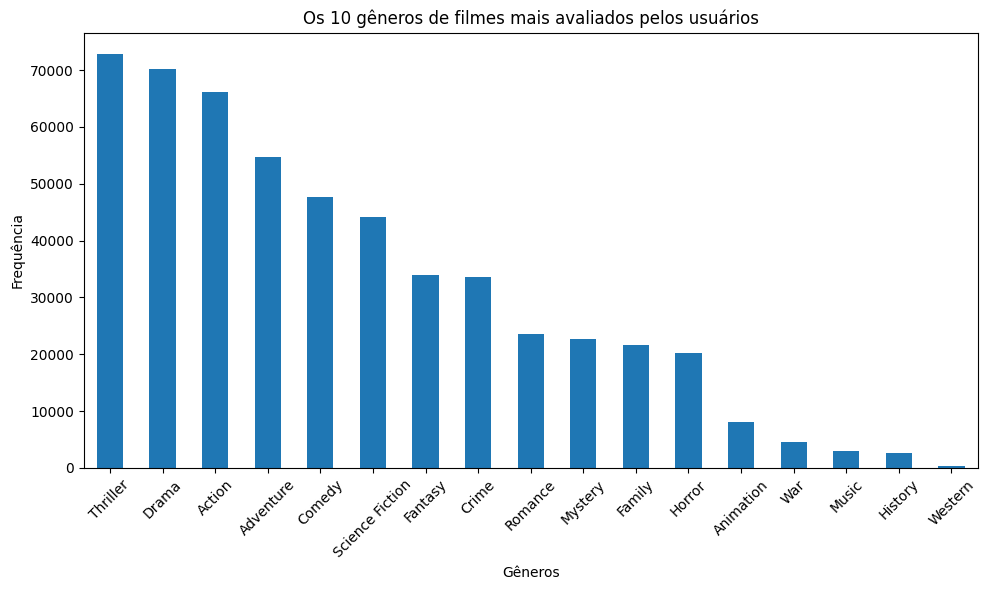

In [10]:
plt.figure(figsize=(10, 6))
top_generos.plot(kind='bar')
plt.title('Os {} gêneros de filmes mais avaliados pelos usuários'.format(num_top_produtoras))
plt.xlabel('Gêneros')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
plt.tight_layout()

In [11]:
cc=top_produtoras.head(10)

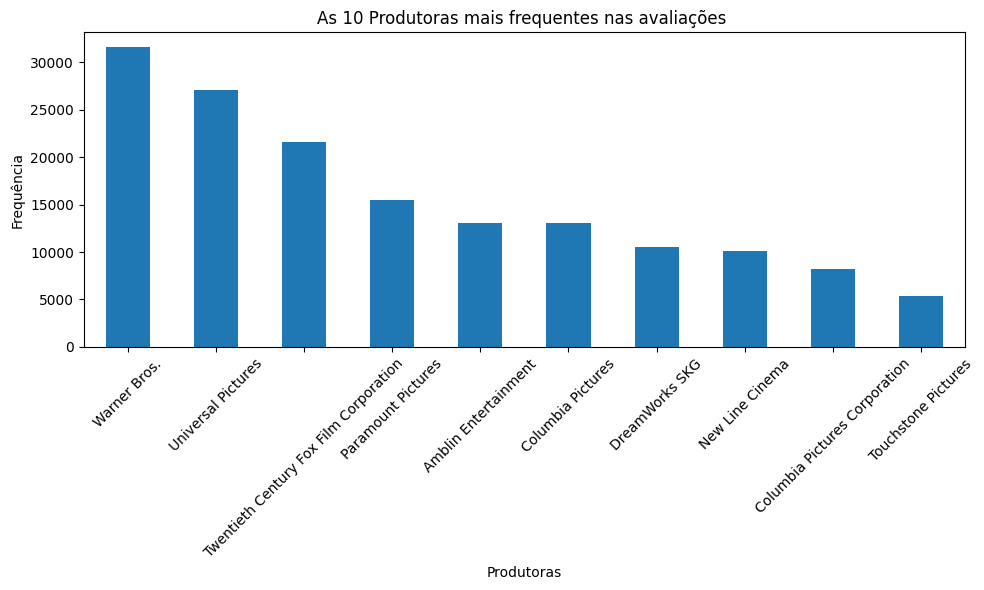

In [12]:
plt.figure(figsize=(10, 6))
cc.plot(kind='bar')
plt.title('As {} Produtoras mais frequentes nas avaliações '.format(num_top_produtoras))
plt.xlabel('Produtoras')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
plt.tight_layout()

In [16]:
qq=avaliacoes_e_filmes.sort_values(by='QT_AVALIACOES', ascending=False)

In [17]:
qq.head(3)

,ID_USUARIO,AVALIACAO,TITULO,LINGUAGEM,QT_AVALIACOES,GENEROS,PRODUTORAS
189761,243331,4.0,Inception,en,14075.0,"[Action, Thriller, Science Fiction, Mystery, A...","[Legendary Pictures, Warner Bros., Syncopy]"
189760,225396,4.5,Inception,en,14075.0,"[Action, Thriller, Science Fiction, Mystery, A...","[Legendary Pictures, Warner Bros., Syncopy]"
189759,45811,4.0,Inception,en,14075.0,"[Action, Thriller, Science Fiction, Mystery, A...","[Legendary Pictures, Warner Bros., Syncopy]"


In [18]:
pp=pd.DataFrame()

In [19]:
pp["TITULO"]=qq['TITULO']
pp['QT_AVALIACOES']=qq['QT_AVALIACOES']

In [25]:
pp

,TITULO,QT_AVALIACOES
189761,Inception,14075.0
189760,Inception,14075.0
189759,Inception,14075.0
189758,Inception,14075.0
168309,The Dark Knight,12269.0
...,...,...
189141,Goldfinger,1005.0
189142,Goldfinger,1005.0
189143,Goldfinger,1005.0
189147,Goldfinger,1005.0


In [20]:
df_sem_duplicatas = pp.drop_duplicates()

In [21]:
filme=df_sem_duplicatas.head(10)

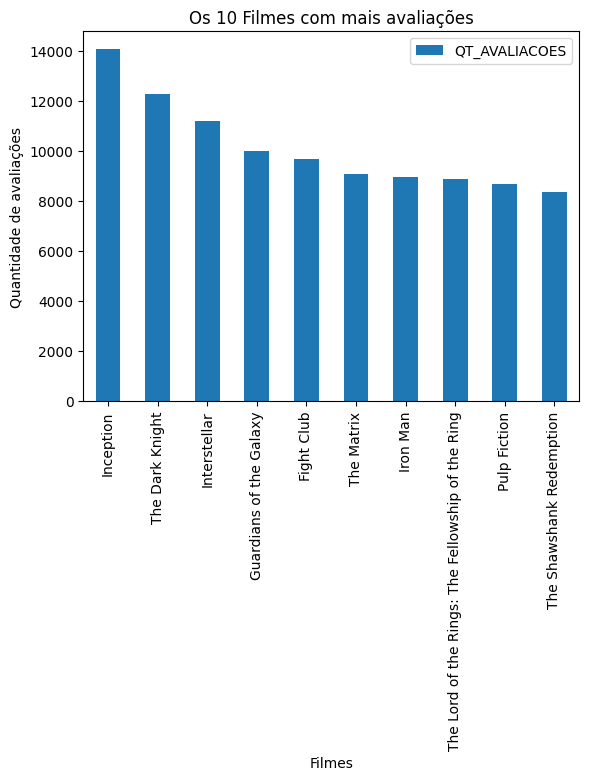

In [22]:
filme.plot(x='TITULO', y='QT_AVALIACOES', kind='bar')
plt.xlabel('Filmes')
plt.ylabel('Quantidade de avaliações')
plt.title('Os 10 Filmes com mais avaliações')
plt.show()